In [134]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px



In [135]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

Frequent consumption of high caloric food **(FAVC)** \
Frequency of consumption of vegetables **(FCVC)** \
Number of main meals **(NCP)**\
Consumption of food between meals **(CAEC)**\
Consumption of water daily **(CH20)**\
Consumption of alcohol **(CALC)**\
Calories consumption monitoring **(SCC)**\
Physical activity frequency **(FAF)**\
Time using technology devices **(TUE)**\
Transportation used **(MTRANS)**\
NObeyesdad : Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III


In [136]:
print('Data_set shape:', data.shape)
data.head()

Data_set shape: (2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [137]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [138]:
#dtypes per columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [139]:
#Ttotal NaN entries and row duplicates
data = data.drop_duplicates()

print('Total dataset NaN values:', data.isnull().sum().sum())
print('Total dataset row duplicates:', data.duplicated().sum())

Total dataset NaN values: 0
Total dataset row duplicates: 0


In [140]:
# Target categories 
data['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: NObeyesdad, dtype: int64

In [141]:
#Observing values count per column 

def value_counts_column(data):
    for column in data.columns:
        print(data[column].value_counts())
    return None

value_counts_column(data)

Male      1052
Female    1035
Name: Gender, dtype: int64
18.000000    126
26.000000    101
23.000000     89
21.000000     78
19.000000     59
            ... 
31.793937      1
23.367212      1
37.974483      1
27.394123      1
24.053310      1
Name: Age, Length: 1402, dtype: int64
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.800000    28
            ..
1.766626     1
1.698049     1
1.732096     1
1.770124     1
1.527133     1
Name: Height, Length: 1574, dtype: int64
80.000000     59
50.000000     42
75.000000     39
60.000000     37
70.000000     29
              ..
112.957922     1
41.669346      1
108.829395     1
51.524444      1
81.650778      1
Name: Weight, Length: 1525, dtype: int64
yes    1722
no      365
Name: family_history_with_overweight, dtype: int64
yes    1844
no      243
Name: FAVC, dtype: int64
3.000000    647
2.000000    581
1.000000     33
2.397280      2
2.816460      2
           ... 
2.425503      1
2.323351      1
2.739000      1
2.919526      1


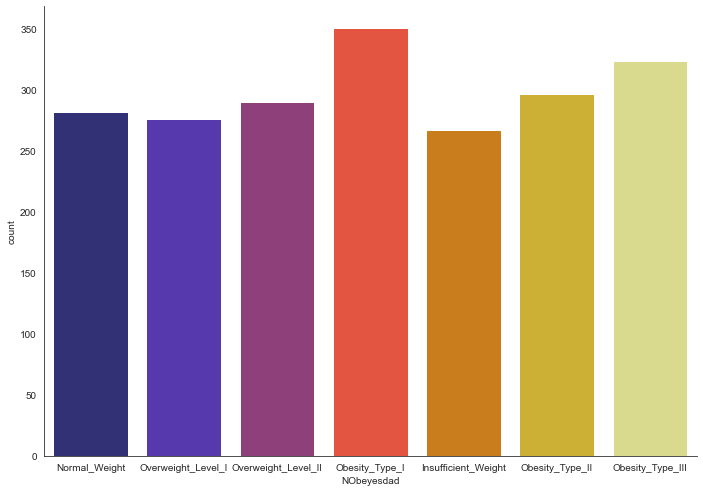

In [142]:
sns.set_style('white')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x = 'NObeyesdad', data = data, palette="CMRmap")  
sns.despine()


**The distribution of in the target categorical column is uniform, that implies that artificial balance is not required**

In [143]:
#Label encoding of categorical columns 

from sklearn.preprocessing import LabelEncoder

categorical_columns_list = ['Gender', 'family_history_with_overweight', 
                            'FAVC', 'CAEC','SMOKE','SCC', 'CALC','MTRANS', 'NObeyesdad' ]

for column in categorical_columns_list:
    labelencoder = LabelEncoder()
    data[column] = labelencoder.fit_transform(data[column])
    
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

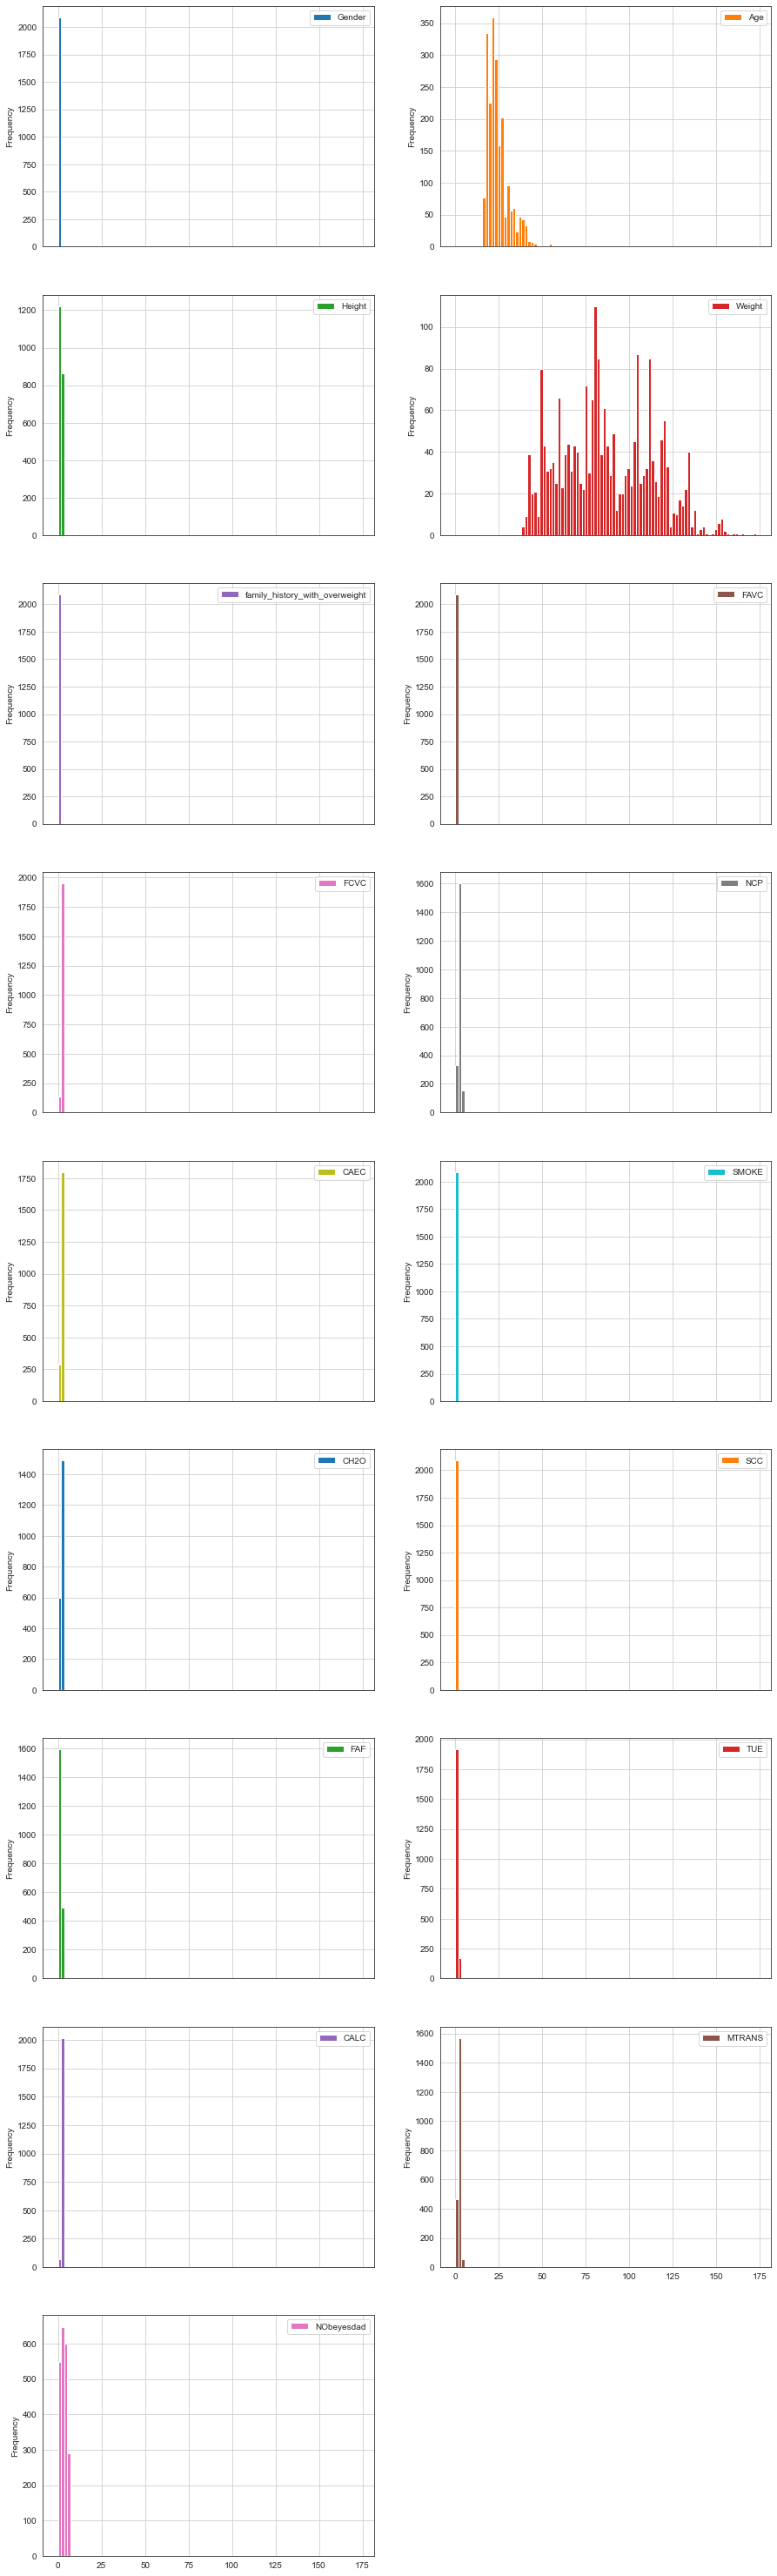

In [144]:
#Distribution of each feature

data.plot.hist(bins = 100, subplots = True, grid = True, layout = (10, 2), figsize = (15,60))

In [145]:
#STANDARIZATION OF FEATURES 

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled = scaler.fit_transform(data.drop('NObeyesdad', axis =1))

scaled_data = pd.DataFrame(scaled)
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.008179,-0.526613,-0.887408,-0.872985,0.460394,-2.754719,-0.788364,0.390906,0.318128,-0.146755,-0.007810,-0.219584,-1.186977,0.554211,1.411836,0.506768
1,-1.008179,-0.526613,-1.960788,-1.178508,0.460394,-2.754719,1.082164,0.390906,0.318128,6.814090,1.636552,4.554073,2.328908,-1.090505,-0.522834,0.506768
2,0.991887,-0.212507,1.044677,-0.376509,0.460394,-2.754719,-0.788364,0.390906,0.318128,-0.146755,-0.007810,-0.219584,1.156947,0.554211,-2.457503,0.506768
3,0.991887,0.415705,1.044677,0.005395,-2.172052,-2.754719,1.082164,0.390906,0.318128,-0.146755,-0.007810,-0.219584,1.156947,-1.090505,-2.457503,1.297220
4,0.991887,-0.369560,0.830001,0.112328,-2.172052,-2.754719,-0.788364,-2.225418,0.318128,-0.146755,-0.007810,-0.219584,-1.186977,-1.090505,-0.522834,0.506768


In [146]:
#Selection of the features matrix X and prediction vector y 

X = scaled_data

y =  data['NObeyesdad']


In [147]:
#Sppliting the data 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=40, test_size=0.33
)


assert X_train.shape[0] == y_train.shape[0], 'Incorrect dimensions'
assert X_test.shape[0] == y_test.shape[0], 'Incorrect dimensions' 
assert X_train.shape[1] == X_test.shape[1], 'Incorrect dimensions'

In [148]:
#Modeling using random forest 

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_predic = RF.predict(X_test)

accuracy = RF.score(X_test, y_test)
print('base model accuracy:', accuracy)

base model accuracy: 0.9579100145137881


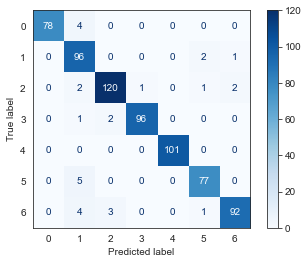

In [149]:
#EVALUATION METRICS FOR EACH TARGET CATEGORY

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


plot_confusion_matrix(RF, X_test, y_test, cmap=plt.cm.Blues)

In [150]:
#ROC_AUC metric

from sklearn.metrics import roc_auc_score

y_pred_probs = RF.predict_proba(X_test)

avg_ROC_AUC_score = roc_auc_score(
    y_test, y_pred_probs, multi_class="ovr", average="weighted"
  )

print('Average ROC AUN score:', avg_ROC_AUC_score)

Average ROC AUN score: 0.9978876028221287


In [151]:

# GENERATE ROC_AUC SCORE FOR EACH CATEGORY

for i in range(1,7):
    idx = np.where(RF.classes_ == i)[0][0]
    print( i, roc_auc_score(y_test == 1, y_pred_probs[:, idx]))


1 0.9942989214175655
2 0.4227529532614278
3 0.375894538606403
4 0.4323403526793357
5 0.7654853620955315
6 0.5901985961307995


In [152]:
#Precision, Recall and F1 scores for multiclass classification

from sklearn.metrics import classification_report

classification_report1 = classification_report(y_test, y_predic)

print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        82
           1       0.86      0.97      0.91        99
           2       0.96      0.95      0.96       126
           3       0.99      0.97      0.98        99
           4       1.00      1.00      1.00       101
           5       0.95      0.94      0.94        82
           6       0.97      0.92      0.94       100

    accuracy                           0.96       689
   macro avg       0.96      0.96      0.96       689
weighted avg       0.96      0.96      0.96       689

